In [104]:
# imports/config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from math import floor, ceil

plt.rcParams['figure.figsize'] = [20, 12]

In [105]:
def reject_outliers(data, lower=.01, upper=.025) :
    data.sort()
    l = len(data)
    upper = int(l * upper)
    lower = int(l * lower)
    return data[lower:-upper]

In [106]:
# read in dataset
firefox = pd.read_csv("./firefox/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
firefox_rf = pd.read_csv("./firefox_rf/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
firefox_rf_NJ = pd.read_csv("./firefox_rf_NJ/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])

In [107]:
# 16.66ms
resist = firefox_rf['unisolated_resist'].to_numpy().round(1)
resist = reject_outliers(resist)
uniques = np.unique(resist)
print('uniques:', uniques)
s = 10
resist_ticks = np.arange(floor(uniques.min()  / s) * s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_ticks = np.concatenate((resist_ticks,  uniques))
resist_ticks = np.unique(resist_ticks)

resist_ticks.sort()
resist_ticks = resist_ticks[resist_ticks  != 85]
resist_ticks = resist_ticks[resist_ticks  != 120]

resist_ticks = np.unique(np.concatenate((uniques, [100])))
print('ticks:  ', resist_ticks)

uniques: [ 83.3 100.  116.7]
ticks:   [ 83.3 100.  116.7]


In [108]:
# 16.66ms NJ
resist_NJ = firefox_rf_NJ['unisolated_resist_NJ'].to_numpy().round(1)
resist_NJ = reject_outliers(resist_NJ)
uniques = np.unique(resist_NJ)
print('uniques:', uniques)

uniques: [100.  116.7]


In [109]:
# 20ms
resist_20ms = firefox_rf['unisolated_resist_20ms'].to_numpy().round(1)
resist_20ms = reject_outliers(resist_20ms)
uniques = np.unique(resist_20ms)
print('uniques:', uniques)
s = 25
resist_20ms_ticks = np.arange(floor(uniques.min()  / s) * s - s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_20ms_ticks = np.concatenate((resist_20ms_ticks,  uniques))
resist_20ms_ticks = np.unique(resist_20ms_ticks)
resist_20ms_ticks.sort()

resist_20ms_ticks = np.unique(np.concatenate((uniques, [100])))
print('ticks:  ', resist_20ms_ticks)

uniques: [ 80 100 120]
ticks:   [ 80 100 120]


In [110]:
# 20ms NJ
resist_20ms_NJ = firefox_rf_NJ['unisolated_resist_20ms_NJ'].to_numpy().round(1)
resist_20ms_NJ = reject_outliers(resist_20ms_NJ)
uniques = np.unique(resist_20ms)
print('uniques:', uniques)


uniques: [ 80 100 120]


In [111]:
# 33ms
resist_33ms = firefox_rf['unisolated_resist_33ms'].to_numpy().round(1)
resist_33ms = reject_outliers(resist_33ms)
uniques = np.unique(resist_33ms)
print('uniques:', uniques)
s = 25
resist_33ms_ticks = np.arange(floor(uniques.min()  / s) * s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_33ms_ticks = np.concatenate((resist_33ms_ticks,  uniques))
resist_33ms_ticks = np.unique(resist_33ms_ticks)
resist_33ms_ticks.sort()
resist_33ms_ticks = resist_33ms_ticks[resist_33ms_ticks  != 70]
resist_33ms_ticks = resist_33ms_ticks[resist_33ms_ticks  != 130]

resist_33ms_ticks = np.unique(np.concatenate((uniques, [100])))
print('ticks:  ', resist_33ms_ticks)

uniques: [ 66.7 100.  133.3]
ticks:   [ 66.7 100.  133.3]


In [112]:
# 33ms NJ
resist_33ms_NJ = firefox_rf_NJ['unisolated_resist_33ms_NJ'].to_numpy().round(1)
resist_33ms_NJ = reject_outliers(resist_33ms_NJ)
uniques = np.unique(resist_33ms_NJ)
print('uniques:', uniques)


uniques: [100.]


In [113]:
# 40ms
resist_40ms = firefox_rf['unisolated_resist_40ms'].to_numpy().round(1)
resist_40ms = reject_outliers(resist_40ms)
uniques = np.unique(resist_40ms)
print(uniques)
s = 50
resist_40ms_ticks = np.arange(floor(uniques.min()  / s) * s - s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_40ms_ticks = np.concatenate((resist_40ms_ticks,  uniques))
resist_40ms_ticks = np.unique(resist_40ms_ticks)
resist_40ms_ticks.sort()

resist_40ms_ticks = np.unique(np.concatenate((uniques, [100])))
print(resist_40ms_ticks)

[ 40  80 120]
[ 40  80 100 120]


In [114]:
# 40ms NJ
resist_40ms_NJ = firefox_rf_NJ['unisolated_resist_40ms_NJ'].to_numpy().round(1)
resist_40ms_NJ = reject_outliers(resist_40ms_NJ)
uniques = np.unique(resist_40ms_NJ)
print(uniques)

[ 80 120]


In [115]:
# 60ms
resist_60ms = firefox_rf['unisolated_resist_60ms'].to_numpy().round(1)
resist_60ms = reject_outliers(resist_60ms)
uniques = np.unique(resist_60ms)
print(uniques)
s = 50
resist_60ms_ticks = np.arange(floor(uniques.min()  / s) * s - s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_60ms_ticks = np.concatenate((resist_60ms_ticks,  uniques))
resist_60ms_ticks = np.unique(resist_60ms_ticks)
resist_60ms_ticks.sort()

resist_60ms_ticks = np.unique(np.concatenate((uniques, [100])))
print(resist_60ms_ticks)

[ 60 120 180]
[ 60 100 120 180]


In [116]:
# 60ms NJ
resist_60ms_NJ = firefox_rf_NJ['unisolated_resist_60ms_NJ'].to_numpy().round(1)
resist_60ms_NJ = reject_outliers(resist_60ms_NJ)
uniques = np.unique(resist_60ms_NJ)
print(uniques)


[ 60 120]


In [117]:
# 80ms
resist_80ms = firefox_rf['unisolated_resist_80ms'].to_numpy().round(1)
resist_80ms = reject_outliers(resist_80ms)
uniques = np.unique(resist_80ms)
print(uniques)
s = 50
resist_80ms_ticks = np.arange(floor(uniques.min()  / s) * s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_80ms_ticks = np.concatenate((resist_80ms_ticks,  uniques))
resist_80ms_ticks = np.unique(resist_80ms_ticks)
resist_80ms_ticks.sort()

resist_80ms_ticks = np.unique(np.concatenate((uniques, [100])))
print(resist_80ms_ticks)

[  0  80 160]
[  0  80 100 160]


In [118]:
# 80ms NJ
resist_80ms_NJ = firefox_rf_NJ['unisolated_resist_80ms_NJ'].to_numpy().round(1)
resist_80ms_NJ = reject_outliers(resist_80ms_NJ)
uniques = np.unique(resist_80ms_NJ)
print(uniques)

[ 80 160]


In [119]:
# 100ms
resist_100ms = firefox_rf['unisolated_resist_100ms'].to_numpy().round(1)
resist_100ms = reject_outliers(resist_100ms)
uniques = np.unique(resist_100ms)
print(uniques)
s = 50
resist_100ms_ticks = np.arange(floor(uniques.min()  / s) * s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_100ms_ticks = np.concatenate((resist_100ms_ticks,  uniques))
resist_100ms_ticks = np.unique(resist_100ms_ticks)
resist_100ms_ticks.sort()

resist_100ms_ticks = np.unique(np.concatenate((uniques, [100])))
print(resist_100ms_ticks)

[  0 100 200]
[  0 100 200]


In [120]:
# 100ms NJ
resist_100ms_NJ = firefox_rf_NJ['unisolated_resist_100ms_NJ'].to_numpy().round(1)
resist_100ms_NJ = reject_outliers(resist_100ms_NJ)
uniques = np.unique(resist_100ms_NJ)
print(uniques)

[100]


In [121]:
# 120ms
resist_120ms = firefox_rf['unisolated_resist_120ms'].to_numpy().round(1)
resist_120ms = reject_outliers(resist_120ms)
uniques = np.unique(resist_120ms)
print(uniques)
s = 40
resist_120ms_ticks = np.arange(floor(uniques.min()  / s) * s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_120ms_ticks = np.concatenate((resist_120ms_ticks,  uniques))
resist_120ms_ticks = np.unique(resist_120ms_ticks)
resist_120ms_ticks.sort()

resist_120ms_ticks = np.unique(np.concatenate((uniques, [100])))
print(resist_120ms_ticks)

[  0 120 240]
[  0 100 120 240]


In [122]:
# 120ms NJ
resist_120ms_NJ = firefox_rf_NJ['unisolated_resist_120ms_NJ'].to_numpy().round(1)
resist_120ms_NJ = reject_outliers(resist_120ms_NJ)
uniques = np.unique(resist_120ms_NJ)
print(uniques)

[  0 120]


In [123]:
# 140ms
resist_140ms = firefox_rf['unisolated_resist_140ms'].to_numpy().round(1)
resist_140ms = reject_outliers(resist_140ms)
uniques = np.unique(resist_140ms)
print(uniques)
s = 40
resist_140ms_ticks = np.arange(floor(uniques.min()  / s) * s, ceil(uniques.max() / s)  *  s + 2 * s, s)
resist_140ms_ticks = np.concatenate((resist_140ms_ticks,  uniques))
resist_140ms_ticks = np.unique(resist_140ms_ticks)
resist_140ms_ticks.sort()
resist_140ms_ticks = resist_140ms_ticks[resist_140ms_ticks  != 150]
resist_140ms_ticks = resist_140ms_ticks[resist_140ms_ticks  != 270]

resist_140ms_ticks = np.unique(np.concatenate((uniques, [100])))
print(resist_140ms_ticks)

[  0 140 280]
[  0 100 140 280]


In [124]:
# 140ms NJ
resist_140ms_NJ = firefox_rf_NJ['unisolated_resist_140ms_NJ'].to_numpy().round(1)
resist_140ms_NJ = reject_outliers(resist_140ms_NJ)
uniques = np.unique(resist_140ms_NJ)
print(uniques)


[  0 140]


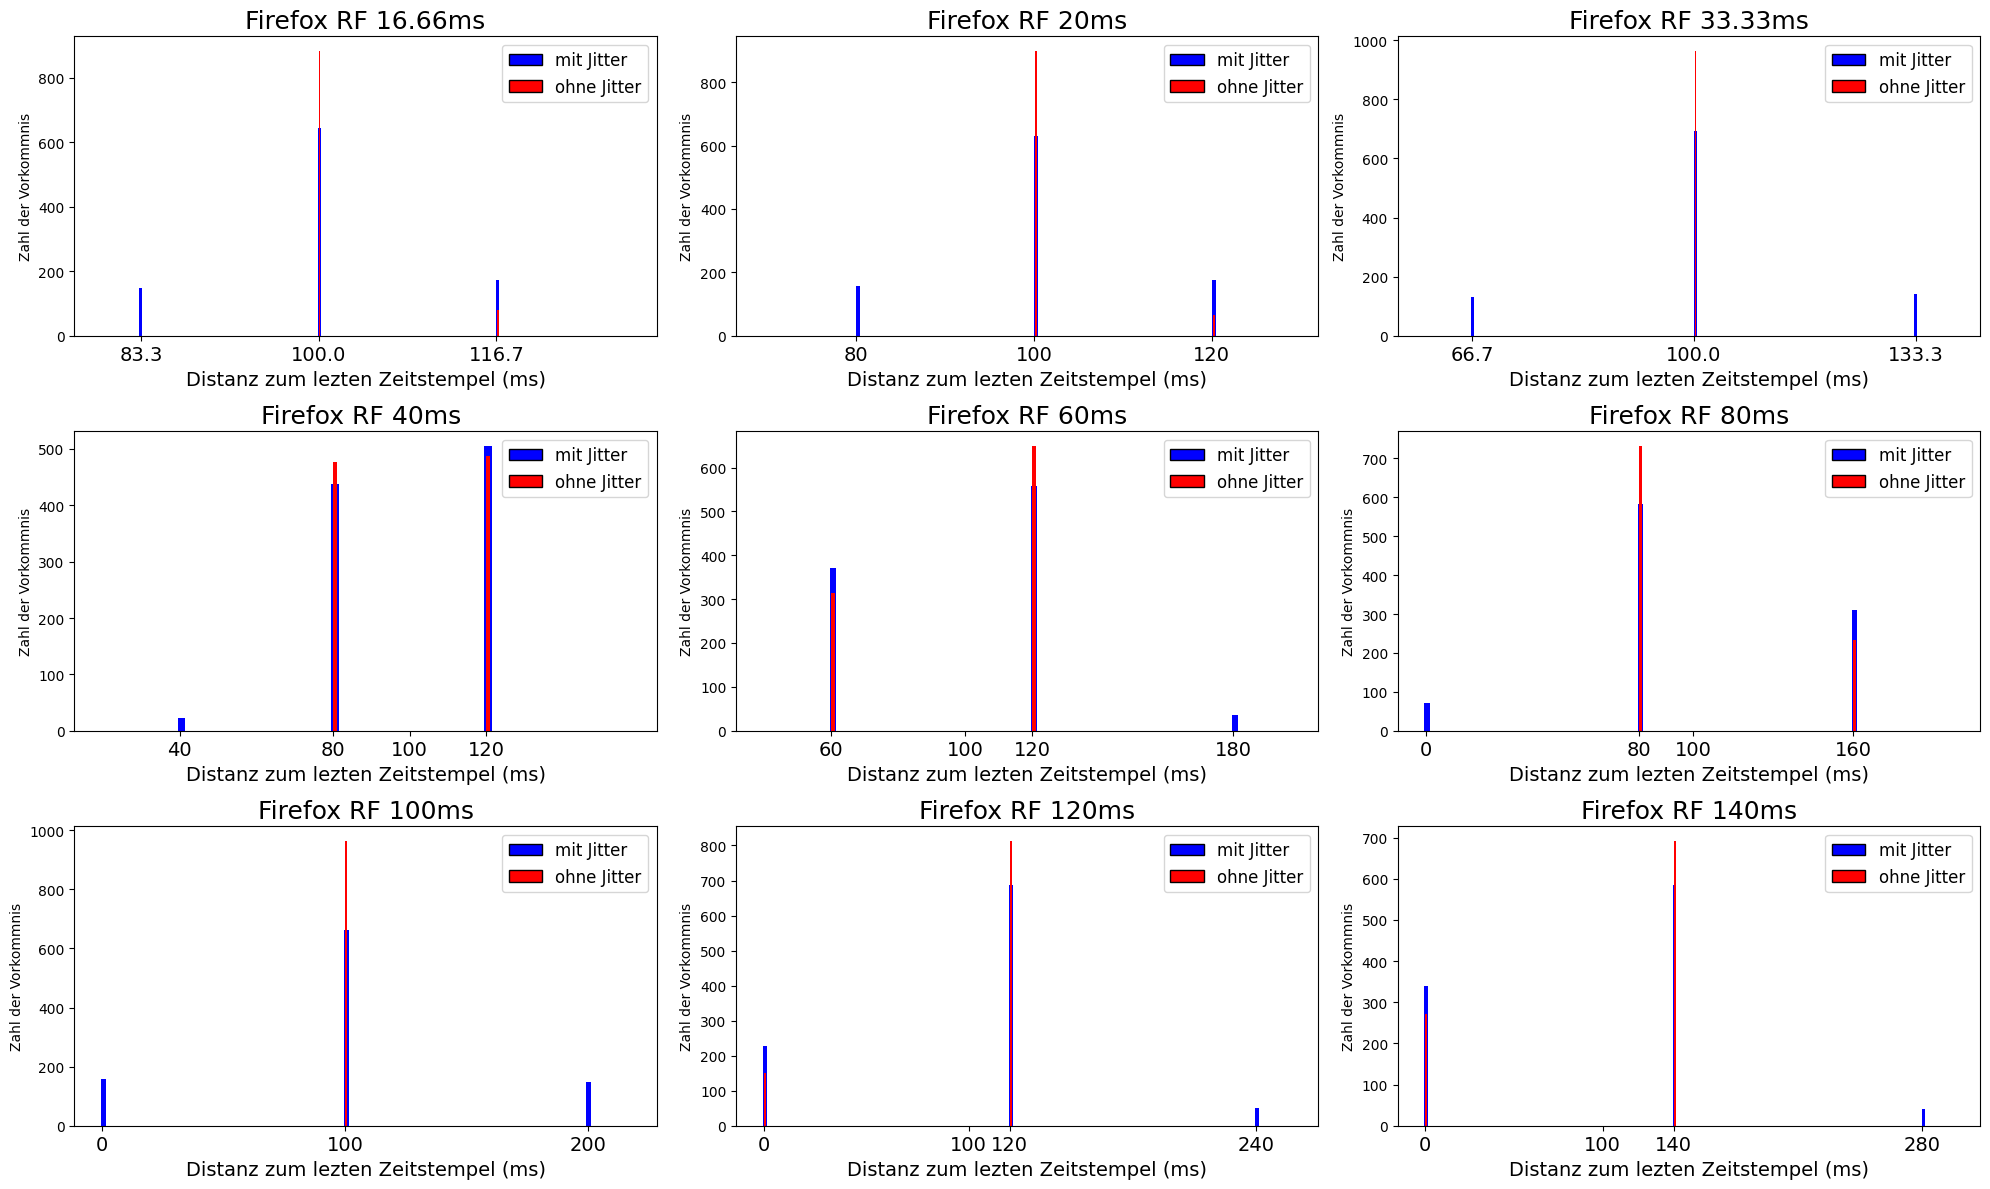

In [125]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 3)
handles = [Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ["blue", "red"]]
labels = ["mit Jitter", "ohne Jitter"]


# resist
axis[0, 0].hist(x=resist, color="blue", bins = np.arange(80, 130, 0.3) - 0.5)
axis[0, 0].hist(x=resist_NJ, color="red", bins = np.arange(80, 130, 0.3) - 0.5, alpha=1, rwidth=0.5)
axis[0, 0].set_title("Firefox RF 16.66ms", fontsize= 18)
axis[0, 0].set_ylabel("Zahl der Vorkommnis")
axis[0, 0].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[0, 0].set_xticks(resist_ticks, fontsize=14, labels=[str(x) for x in resist_ticks])
axis[0, 0].legend(handles, labels, fontsize=12)

# resist_20ms
axis[0, 1].hist(x=resist_20ms, color="blue", bins = np.arange(70, 130, 0.5) - 0.5)
axis[0, 1].hist(x=resist_20ms_NJ, color="red", bins = np.arange(70, 130, 0.5) - 0.5, alpha=1, rwidth=0.5)
axis[0, 1].set_title("Firefox RF 20ms", fontsize= 18)
axis[0, 1].set_ylabel("Zahl der Vorkommnis")
axis[0, 1].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[0, 1].set_xticks(resist_20ms_ticks, fontsize=14, labels=[str(x) for x in resist_20ms_ticks])
axis[0, 1].legend(handles, labels, fontsize=12)


# resist_33ms
axis[0, 2].hist(x=resist_33ms, color="blue", bins = np.arange(60, 140, 0.5) - 0.5)
axis[0, 2].hist(x=resist_33ms_NJ, color="red", bins = np.arange(60, 140, 0.5) - 0.5, alpha=1, rwidth=0.5)
axis[0, 2].set_title("Firefox RF 33.33ms", fontsize= 18)
axis[0, 2].set_ylabel("Zahl der Vorkommnis")
axis[0, 2].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[0, 2].set_xticks(resist_33ms_ticks, fontsize=14, labels=[str(x) for x in resist_33ms_ticks])
axis[0, 2].legend(handles, labels, fontsize=12)


# resist_40ms
axis[1, 0].hist(x=resist_40ms, color="blue", bins = np.arange(20, 160, 2) - 0.5)
axis[1, 0].hist(x=resist_40ms_NJ, color="red", bins = np.arange(20, 160, 2) - 0.5, alpha=1, rwidth=0.5)
axis[1, 0].set_title("Firefox RF 40ms ", fontsize= 18)
axis[1, 0].set_ylabel("Zahl der Vorkommnis")
axis[1, 0].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[1, 0].set_xticks(resist_40ms_ticks, fontsize=14, labels=[str(x) for x in resist_40ms_ticks])
axis[1, 0].legend(handles, labels, fontsize=12)


# resist_60ms
axis[1, 1].hist(x=resist_60ms,color="blue", bins = np.arange(40, 200, 2) - 0.5)
axis[1, 1].hist(x=resist_60ms_NJ,color="red", bins = np.arange(40, 200, 2) - 0.5, alpha=1, rwidth=0.5)
axis[1, 1].set_title("Firefox RF 60ms", fontsize= 18)
axis[1, 1].set_ylabel("Zahl der Vorkommnis")
axis[1, 1].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[1, 1].set_xticks(resist_60ms_ticks, fontsize=14, labels=[str(x) for x in resist_60ms_ticks])
axis[1, 1].legend(handles, labels, fontsize=12)


# resist_80ms
axis[1, 2].hist(x=resist_80ms, color="blue", bins = np.arange(0, 200, 2) - 0.5)
axis[1, 2].hist(x=resist_80ms_NJ, color="red", bins = np.arange(0, 200, 2) - 0.5, alpha=1, rwidth=0.5)
axis[1, 2].set_title("Firefox RF 80ms", fontsize= 18)
axis[1, 2].set_ylabel("Zahl der Vorkommnis")
axis[1, 2].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[1, 2].set_xticks(resist_80ms_ticks, fontsize=14, labels=[str(x) for x in resist_80ms_ticks])
axis[1, 2].legend(handles, labels, fontsize=12)

# resist_100ms
axis[2, 0].hist(x=resist_100ms, color="blue", bins = np.arange(0, 220, 2) - 0.5)
axis[2, 0].hist(x=resist_100ms_NJ, color="red", bins = np.arange(0, 220, 2) - 0.5, alpha=1, rwidth=0.5)
axis[2, 0].set_title("Firefox RF 100ms", fontsize= 18)
axis[2, 0].set_ylabel("Zahl der Vorkommnis")
axis[2, 0].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[2, 0].set_xticks(resist_100ms_ticks, fontsize=14, labels=[str(x) for x in resist_100ms_ticks])
axis[2, 0].legend(handles, labels, fontsize=12)

# resist_120ms
axis[2, 1].hist(x=resist_120ms, color="blue", bins = np.arange(0, 260, 2) - 0.5)
axis[2, 1].hist(x=resist_120ms_NJ, color="red", bins = np.arange(0, 260, 2) - 0.5, alpha=1, rwidth=0.5)
axis[2, 1].set_title("Firefox RF 120ms", fontsize= 18)
axis[2, 1].set_ylabel("Zahl der Vorkommnis")
axis[2, 1].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[2, 1].set_xticks(resist_120ms_ticks, fontsize=14, labels=[str(x) for x in resist_120ms_ticks])
axis[2, 1].legend(handles, labels, fontsize=12)

# resist_140ms
axis[2, 2].hist(x=resist_140ms, color="blue", bins = np.arange(0, 300, 2) - 0.5)
axis[2, 2].hist(x=resist_140ms_NJ, color="red", bins = np.arange(0, 300, 2) - 0.5, alpha=1, rwidth=0.5)
axis[2, 2].set_title("Firefox RF 140ms", fontsize= 18)
axis[2, 2].set_ylabel("Zahl der Vorkommnis")
axis[2, 2].set_xlabel("Distanz zum lezten Zeitstempel (ms)", fontsize= 14)
axis[2, 2].set_xticks(resist_140ms_ticks, fontsize=14, labels=[str(x) for x in resist_140ms_ticks])
axis[2, 2].legend(handles, labels, fontsize=12)


plt.tight_layout()
plt.savefig("./combined_rf.jpeg", bbox_inches="tight", pad_inches=0.3)
plt.show()